In [2]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

random_state = 0
np.random.seed(0)  # Para mayor determinismo

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [4]:
productos = pd.read_pickle('../models/productos_3000.pkl', compression='zip')

In [25]:
productos[['nombre_marca_depurado','producto_vino','producto_chocolate','producto_marca','producto_queso']].sample(15)

,nombre_marca_depurado,producto_vino,producto_chocolate,producto_marca,producto_queso
70851,marca ternera bandeja asado,0,0,1,0
3224,paulina queso parmesano,0,0,0,1
36450,manzana jugo listo cepita,0,0,0,0
51928,fideos marolio spaghetti,0,0,0,0
17804,tinto vino dulce brik cavic,1,0,0,0
27080,arcor mogul aranitas gomitas,0,0,0,0
53293,supremitas marca fillette inner,0,0,1,0
20061,asurin bolsas cm residuos,0,0,0,0
61524,pera chanar chañar mermelada,0,0,0,0
7310,mignon salvado aiello pan,0,0,0,0


In [5]:
# nos quedamos solamente con las columnas binarias
df_productos = productos.filter(regex=("producto_*"))

In [6]:
df_productos.sample(1)

,producto_marca,producto_vino,producto_queso,producto_chocolate,producto_galletitas,producto_leche,producto_dulce,producto_tinto,producto_crema,producto_jabon,producto_blanco,producto_polvo,producto_desodorante,producto_pan,producto_fideos,producto_liquido,producto_shampoo,producto_vainilla,producto_jugo,producto_carrefour,producto_pollo,producto_light,producto_bandeja,producto_naranja,producto_frutilla,producto_agua,producto_malbec,producto_limpiador,producto_acondicionador,producto_jamon,producto_dia,producto_aceite,producto_limon,producto_arroz,producto_cerdo,producto_natural,producto_tono,producto_primer,producto_yogur,producto_precio,producto_doypack,producto_manzana,producto_mermelada,producto_mani,producto_lata,producto_sal,producto_salsa,producto_alimento,producto_extra,producto_aerosol,producto_carne,producto_cabernet,producto_sabor,producto_te,producto_coloracion,producto_cerveza,producto_saquitos,producto_color,producto_serenisima,producto_cremoso,producto_trozado,producto_tintura,producto_gel,producto_mate,producto_durazno,producto_novillo,producto_frasco,producto_saborizada,producto_cm,producto_don,producto_sauvignon,producto_arcor,producto_aceitunas,producto_tapas,producto_esponja,...,producto_recuperacion,producto_aguirre,producto_naftalina,producto_vual,producto_estero,producto_caracol,producto_marinera,producto_limpiavidrios,producto_extraordinario,producto_split,producto_noal,producto_castanas,producto_hogar,producto_pol,producto_luminoso,producto_muffin,producto_chutney,producto_reparador,producto_riojanas,producto_estragon,producto_opi,producto_termica,producto_avengers,producto_apper,producto_giacomo,producto_danone,producto_oliovita,producto_leger,producto_otro,producto_multimax,producto_chocolinas,producto_medium,producto_ti,producto_mp,producto_abuela,producto_acido,producto_recipiente,producto_lord,producto_sultanina,producto_hereford,producto_multinutrientes,producto_salsati,producto_deliciosa,producto_cavas,producto_intima,producto_toros,producto_cotton,producto_hiperpack,producto_altamoda,producto_despinado,producto_malteados,producto_bauza,producto_lentejones,producto_cuquets,producto_seremix,producto_aposito,producto_trap,producto_visto,producto_slim,producto_cremix,producto_david,producto_fuze,producto_strawberry,producto_bonduelle,producto_fiambres,producto_carey,producto_zapatos,producto_algarroba,producto_edition,producto_blancaflor,producto_etnia,producto_oriental,producto_aime,producto_raiz,producto_otras
8934,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Clustering con Kmeans

In [7]:
# # Veamos si podemos encontrar una cantidad de clusters recomendada segun el metodo elbow

#range_list = [x for x in range(1, 100, 10)]

#scores = [KMeans(n_clusters=i, random_state=10,n_jobs=-1).fit(df_productos).inertia_ for i in range_list]


In [8]:
#from matplotlib import pyplot as plt
#plt.figure(figsize=(7,4))
#plt.plot(range_list, scores)
#plt.xlabel('Number of clusters')
#plt.ylabel("Inertia")
#plt.title("Inertia of k-Means versus number of clusters")
#plt.show()

In [9]:
# Nos quedamos con 50 clusters para ver que onda

For n_clusters = 10 The average silhouette_score is : 0.02603850478230713


KeyboardInterrupt: 

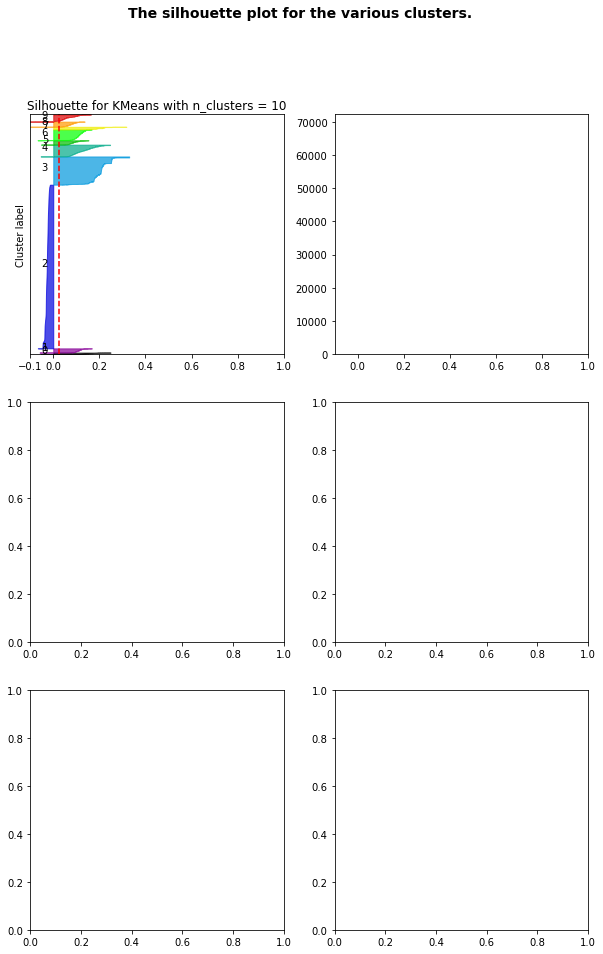

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

f = 0
c = 0

for n_clusters in [10, 20, 30, 40, 50, 60]:

    axes[f,c].set_xlim([-0.1, 1])
    axes[f,c].set_ylim([0, len(df_productos) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_productos)

    silhouette_avg = silhouette_score(df_productos, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_productos, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        axes[f,c].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        axes[f,c].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    axes[f,c].set_title("Silhouette for KMeans with n_clusters = %d" % n_clusters)
    axes[f,c].set_ylabel("Cluster label")
    axes[f,c].axvline(x=silhouette_avg, color="red", linestyle="--")
    axes[f,c].set_yticks([])  # Clear the yaxis labels / ticks
    axes[f,c].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    if c == 1:
        c = 0
        f += 1
    else:
        c += 1

    plt.suptitle(("The silhouette plot for the various clusters."), fontsize=14, fontweight='bold')
    
fig.tight_layout()
plt.show()

In [ ]:
# Nos quedamos con 20 cluster como para ver que onda

In [11]:
n_cluster = 20
km = KMeans(n_clusters = n_cluster, random_state=10)
km.fit(df_productos)
df_productos['km_cluster'] = km.labels_

In [12]:
df_productos['km_cluster'].unique()

array([ 3, 14,  0, 11,  1,  4, 18,  9, 12,  8, 10, 15,  6,  7, 17,  5, 13,
        2, 19, 16])

<AxesSubplot:xlabel='km_cluster', ylabel='count'>

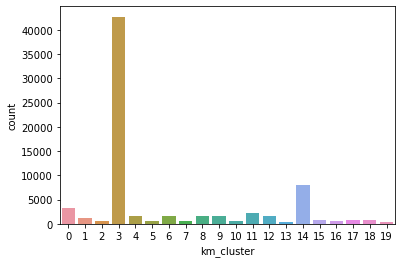

In [13]:
sns.countplot(data=df_productos, x='km_cluster')
#Probablemente el cluster 4 sea el que contiene "otros"

In [14]:
# Veamos que palabras aparecen en un cluster en particular
productos['km_cluster'] = df_productos['km_cluster']

In [15]:
productos[productos['km_cluster'] == 3]['nombre_marca_depurado'].sample(10)

44367              calzado pomada wassington
69784                       dia coco rallado
12022                       montesano salame
44173              mortimer plateada esponja
54509    fausto verdura congelados canelones
42739                  kit issue n". tintura
66348       bless god coco you neutro aceite
59336                                  curry
13118          paleta paladini cerdo fiambre
21294         bodegas valle cuviellier anana
Name: nombre_marca_depurado, dtype: object

In [16]:
n_cluster = 5
km = KMeans(n_clusters = n_cluster, random_state=10)
km.fit(df_productos)
df_productos['km_cluster'] = km.labels_

<AxesSubplot:xlabel='km_cluster', ylabel='count'>

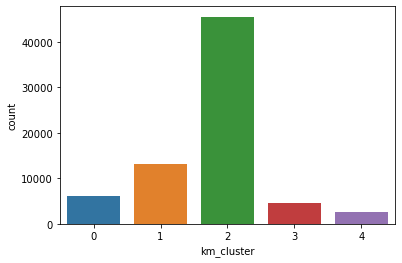

In [17]:
sns.countplot(data=df_productos, x = 'km_cluster')

In [18]:
productos['km_cluster'] = km.labels_

In [19]:
productos[productos['km_cluster'] == 1]['nombre_marca_depurado'].sample(10)

9117                                      marca croissant
5845                             naranja marca jugo chica
19171    chocobar snacks chocolate bano gallo arroz barra
43784               tym frutilla chocolate obleas relleno
57915         aromatizante make marca perfume aire bosque
70240                                 cuerito marca cerdo
49589                              uva rubias marca pasas
4060                        vacio qr marca cuarto trasero
2901                                          marca limon
4821                                         choclo marca
Name: nombre_marca_depurado, dtype: object

In [20]:
productos[productos['km_cluster'] == 2]['nombre_marca_depurado'].sample(10)

60183                                 torteria budin frutiila
43500                      fe extra stout santa cerveza negra
48773                               caroyense dulce membrillo
28444                           b int entera serenisima leche
47795                       escobillon virulana cabo interior
24870                  antigrasa limpiadores lysoform doypack
35740    capas bizcochuelo mase bon rectangular tres vainilla
57342                         naranja jugo pulpa listo citric
66657                                          pala mano best
49327                                        viola noquis don
Name: nombre_marca_depurado, dtype: object

In [31]:
productos[productos['km_cluster'] == 0]['nombre_marca_depurado'].sample(10)

36386              tinto frizee vino classic frizze
23635                       confites mani georgalos
45429                 tost tostadas salvado natural
32365     fina woolite extra detergente ropa blanco
26761                      frutas arcor turron mani
60924                           manitoon mani queso
57618            verdot tinto ruca vino petit malen
40994             jabon ropa liquido borita doypack
38315    vino chardonnay blanco asterisco torrontes
50417                    atun natural bahia lomitos
Name: nombre_marca_depurado, dtype: object

In [29]:
productos[productos['km_cluster'] == 3]['nombre_marca_depurado'].sample(10)

36868                        rose aerosol desodorante flower
2060                e serenisima cremon queso vitamina horma
6934                             cremoso arroyo queso cabral
6802                                paulina queso reggianito
64653                    neymar barcelona desodorante aero n
12231                                  provolone marca queso
36944                       colbert aerosol desodorante noir
2242                      lucio san queso trozado reggianito
36816      d'anvers aerosol d cahen desodorante anvers paula
36120    crema desodorante esencial veritas antitranspirante
Name: nombre_marca_depurado, dtype: object

In [27]:
productos[productos['km_cluster'] == 4]['nombre_marca_depurado'].sample(10)

49605                     horno empanadas tapas don yeyo
9845                                   marca cerdo vacio
56068        agua saborizada pomelo villa levite sur gas
55977                we lemonice agua ser saborizada gas
57767                  apresto limpiador make power ropa
55969    agua frutilla saborizada levite limon doble gas
50469                              copetin tapas tapamar
29234              alijor horno empanadas criollas tapas
3098                                  milan vacio salame
50396                agua awafrut manzana saborizada gas
Name: nombre_marca_depurado, dtype: object

In [52]:
df_productos.groupby('km_cluster').sum().idxmax(axis = 1)

km_cluster
0         producto_vino
1        producto_marca
2        producto_crema
3        producto_queso
4    producto_limpiador
dtype: object

In [64]:
df_cuenta = df_productos.groupby('km_cluster').sum()
df_cuenta

,producto_marca,producto_vino,producto_queso,producto_chocolate,producto_galletitas,producto_leche,producto_dulce,producto_tinto,producto_crema,producto_jabon,producto_blanco,producto_polvo,producto_desodorante,producto_pan,producto_fideos,producto_liquido,producto_shampoo,producto_vainilla,producto_jugo,producto_carrefour,producto_pollo,producto_light,producto_bandeja,producto_naranja,producto_frutilla,producto_agua,producto_malbec,producto_limpiador,producto_acondicionador,producto_jamon,producto_dia,producto_aceite,producto_limon,producto_arroz,producto_cerdo,producto_natural,producto_tono,producto_primer,producto_yogur,producto_precio,producto_doypack,producto_manzana,producto_mermelada,producto_mani,producto_lata,producto_sal,producto_salsa,producto_alimento,producto_extra,producto_aerosol,producto_carne,producto_cabernet,producto_sabor,producto_te,producto_coloracion,producto_cerveza,producto_saquitos,producto_color,producto_serenisima,producto_cremoso,producto_trozado,producto_tintura,producto_gel,producto_mate,producto_durazno,producto_novillo,producto_frasco,producto_saborizada,producto_cm,producto_don,producto_sauvignon,producto_arcor,producto_aceitunas,producto_tapas,producto_esponja,...,producto_recuperacion,producto_aguirre,producto_naftalina,producto_vual,producto_estero,producto_caracol,producto_marinera,producto_limpiavidrios,producto_extraordinario,producto_split,producto_noal,producto_castanas,producto_hogar,producto_pol,producto_luminoso,producto_muffin,producto_chutney,producto_reparador,producto_riojanas,producto_estragon,producto_opi,producto_termica,producto_avengers,producto_apper,producto_giacomo,producto_danone,producto_oliovita,producto_leger,producto_otro,producto_multimax,producto_chocolinas,producto_medium,producto_ti,producto_mp,producto_abuela,producto_acido,producto_recipiente,producto_lord,producto_sultanina,producto_hereford,producto_multinutrientes,producto_salsati,producto_deliciosa,producto_cavas,producto_intima,producto_toros,producto_cotton,producto_hiperpack,producto_altamoda,producto_despinado,producto_malteados,producto_bauza,producto_lentejones,producto_cuquets,producto_seremix,producto_aposito,producto_trap,producto_visto,producto_slim,producto_cremix,producto_david,producto_fuze,producto_strawberry,producto_bonduelle,producto_fiambres,producto_carey,producto_zapatos,producto_algarroba,producto_edition,producto_blancaflor,producto_etnia,producto_oriental,producto_aime,producto_raiz,producto_otras
km_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,99,2842,30,131,2,43,191,1325,10,1555,1001,287,2,90,7,583,6,25,30,42,0,10,0,17,6,10,862,3,5,71,26,11,10,18,1,729,11,48,37,48,154,27,0,666,20,30,5,6,19,0,1,50,21,27,7,0,14,11,4,70,13,5,13,6,18,0,4,0,17,57,92,48,0,0,9,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,12,2,0,0,1,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,11,1,1,0,11,1,0,6,4,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,2,0,11,0,9,0,0
1,8207,148,34,2286,1997,442,375,0,69,10,277,82,7,336,42,4,21,413,39,939,387,82,770,107,171,22,3,14,14,117,81,42,160,99,415,32,34,64,27,64,23,119,12,7,44,135,31,42,229,7,140,0,186,26,28,4,25,24,2,14,25,18,36,12,39,444,6,1,36,24,1,125,26,7,74,...,0,0,0,0,0,1,12,0,0,1,0,6,0,0,0,12,0,0,0,0,0,0,5,0,0,0,0,9,0,0,9,0,0,7,3,0,3,0,6,0,0,0,4,1,2,0,0,0,0,11,5,0,2,5,4,0,0,0,0,0,1,0,0,0,9,3,0,10,0,1,0,1,2,3,0
2,18,574,5,1,1,1444,1281,453,1550,1,10,920,3,854,1236,224,1248,798,1083,35,597,682,173,690,721,1,27,5,859,509,666,774,586,670,286,12,747,624,716,622,473,482,691,4,598,440,619,606,381,252,479,572,382,546,565,593,543,543,173,146,30,521,444,511,439,79,513,46,468,374,423,335,472,0,418,...,14,14,14,11,14,13,2,13,14,13,5,8,12,14,13,2,14,12,2,9,12,14,8,14,12,13,14,5,11,5,5,14,1,7,11,14,11,8,8,3,13,13,6,2,10,14,4,10,14,3,9,14,12,6,10,14,12,14,14,14,2,14,14,14,5,11,14,4,12,13,3,13,3,10,141
3,263,0,3360,0,0,1,7,0,80,0,16,21,1294,10,5,5,0,14,0,8,29,229,0,1,0,36,0,1,0,150,46,5,7,20,2

In [65]:
df_cuenta = df_cuenta.rename(index={0: 'Cluster_0',1: 'Cluster_1',2: 'Cluster_2',3: 'Cluster_3',4: 'Cluster_4'})

In [70]:
df_cuenta.T['Cluster_0'].sort_values(ascending=False)[:10]

producto_vino       2842
producto_jabon      1555
producto_tinto      1325
producto_blanco     1001
producto_malbec      862
producto_natural     729
producto_mani        666
producto_liquido     583
producto_tocador     357
producto_polvo       287
Name: Cluster_0, dtype: int64

In [71]:
df_cuenta.T['Cluster_1'].sort_values(ascending=False)[:10]

producto_marca         8207
producto_chocolate     2286
producto_galletitas    1997
producto_carrefour      939
producto_bandeja        770
producto_novillo        444
producto_leche          442
producto_novillito      418
producto_cerdo          415
producto_vainilla       413
Name: Cluster_1, dtype: int64

In [72]:
df_cuenta.T['Cluster_2'].sort_values(ascending=False)[:10]

producto_crema             1550
producto_leche             1444
producto_dulce             1281
producto_shampoo           1248
producto_fideos            1236
producto_jugo              1083
producto_polvo              920
producto_acondicionador     859
producto_pan                854
producto_vainilla           798
Name: Cluster_2, dtype: int64

In [73]:
df_cuenta.T['Cluster_3'].sort_values(ascending=False)[:10]

producto_queso          3360
producto_desodorante    1294
producto_trozado         491
producto_serenisima      390
producto_aerosol         365
producto_salut           307
producto_cremoso         302
producto_port            298
producto_marca           263
producto_paulina         243
Name: Cluster_3, dtype: int64

In [74]:
df_cuenta.T['Cluster_4'].sort_values(ascending=False)[:10]

producto_limpiador     860
producto_agua          836
producto_tapas         494
producto_gas           488
producto_saborizada    475
producto_liquido       473
producto_vacio         392
producto_empanadas     300
producto_envasado      229
producto_pisos         183
Name: Cluster_4, dtype: int64